### Preparing multiome for pancrea

In [ ]:
import scanpy as sc
import scvelo as scv

In [2]:
cd ~/workspace/theislab/mubind/docs/notebooks/scatac

/mnt/c/Users/IgnacioIbarra/Dropbox/workspace/theislab/mubind/docs/notebooks/scatac


In [3]:
print('here...')

here...


In [4]:
# scvelo related step. Include the velocities
import scvelo as scv
loom1_path = '../../../annotations/scatac/e14.5.loom'
loom2_path = '../../../annotations/scatac/e15.5.loom'
ldata1 = scv.read(loom1_path) #  cache=True)
ldata2 = scv.read(loom2_path) #  cache=True)


In [5]:
rna_path = '../../../annotations/scatac/pancreas_multiome_2022_processed_rna.h5ad'
rna = sc.read_h5ad(rna_path)

In [16]:
rna[rna.obs['sample'] == 'E14.5']

View of AnnData object with n_obs × n_vars = 9811 × 14663
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks'
    var: 'modality'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_pca_wsnn', 'X_spca_wsnn', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'X_umap_wsnn', 'lsi_full', 'lsi_red', 'umap', 'umap_ATAC', 'umap_GEX'
    obsp: 'connectivities', 'connectivities_wnn', 'distances', 'distances_wnn'

In [21]:
print('attempting to merge...')
ad1 = rna[rna.obs['sample'] == 'E14.5',:]
ad2 = rna[rna.obs['sample'] == 'E15.5',:]
print(ad1.shape, ad2.shape)

scv.utils.clean_obs_names(ad1)
scv.utils.clean_obs_names(ldata1)
ad1 = scv.utils.merge(ad1, ldata1)

scv.utils.clean_obs_names(ad2)
scv.utils.clean_obs_names(ldata2)
ad2 = scv.utils.merge(ad2, ldata2)
print(ad1.shape, ad2.shape)
adata = ad1.concatenate(ad2)

attempting to merge...
(9811, 14663) (7107, 14663)
(9811, 14663) (7107, 14663)


In [38]:
ad = adata
# ad = sc.pp.subsample(adata, n_obs=1000, copy=True)
ad.shape


(16918, 14663)

In [41]:
scv.tl.velocity_graph(ad, n_jobs=3)

computing velocities
    finished (0:01:17) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 3/16 cores)


  0%|          | 0/16918 [00:00<?, ?cells/s]

    finished (0:02:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


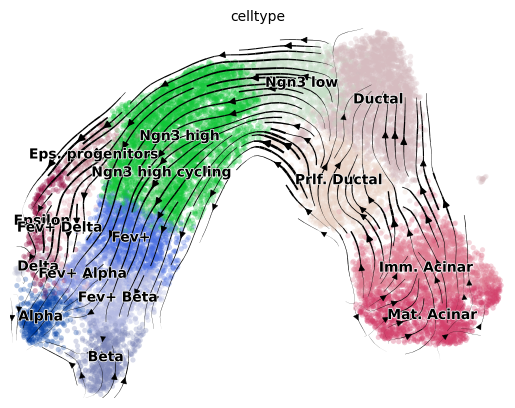

In [42]:
scv.pl.velocity_embedding_stream(ad, color='celltype')

In [43]:
ad.shape

(16918, 14663)

In [45]:
ad.obs_names

Index(['AAACAGCCAACA-0', 'AAACAGCCAACC-0', 'AAACAGCCACCT-0', 'AAACAGCCACTA-0',
       'AAACAGCCAGGA-0', 'AAACAGCCATAA-0', 'AAACATGCAAGG-0',
       'AAACATGCAAGG-1-0', 'AAACATGCACTA-0', 'AAACATGCAGCA-0',
       ...
       'TTTGTGTTCACG-1', 'TTTGTGTTCGAG-1', 'TTTGTGTTCGAT-1', 'TTTGTGTTCGCT-1',
       'TTTGTGTTCTCA-1', 'TTTGTGTTCTTG-1', 'TTTGTTGGTATT-1', 'TTTGTTGGTCCT-1',
       'TTTGTTGGTTAA-1', 'TTTGTTGGTTGT-1'],
      dtype='object', length=16918)

In [44]:
rna_path = '../../../annotations/scatac/pancreas_multiome_2022_processed_rna_velocities_2024.h5ad'
ad.write(rna_path, compression='lzf')